In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

In [56]:
dataset=pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)

In [57]:
dataset.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [58]:
dataset.shape

(43862, 20)

In [59]:
dataset.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

In [60]:
dataset.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


from time_ordered and time_order_picked we can create new column which specify time taken to prepare order

In [61]:
dataset['Time_Orderd'] = pd.to_datetime(dataset['Time_Orderd'], format='%H:%M:%S', errors='coerce')

In [62]:
dataset['Time_Order_picked'] = pd.to_datetime(dataset['Time_Order_picked'], format='%H:%M:%S', errors='coerce')

In [63]:
dataset['Food_Preparation_time_minutes'] = (dataset['Time_Order_picked'] - dataset['Time_Orderd']).dt.total_seconds() / 60



In [64]:
dataset.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Food_Preparation_time_minutes
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,1900-01-01 11:30:00,1900-01-01 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,15.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,1900-01-01 19:45:00,1900-01-01 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,5.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,1900-01-01 08:30:00,1900-01-01 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,15.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,1900-01-01 18:00:00,1900-01-01 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,10.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,1900-01-01 13:30:00,1900-01-01 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,15.0


In [65]:
dataset.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,Time_taken(min),Food_Preparation_time_minutes
count,43862.00000,43862.000000,43862.000000,43862.000000,43862.000000,43862.000000,43862,43862,43862.000000,43862.000000,43862.000000,43862.000000
mean,29.55230,4.635278,17.241971,70.764932,17.462466,70.828527,1900-01-01 17:54:59.856367616,1900-01-01 17:37:42.304500224,1.000889,0.749624,26.293831,-17.292531
min,20.00000,2.500000,-30.902872,0.000000,0.010000,0.010000,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,10.000000,-1435.000000
25%,25.00000,4.500000,12.933298,73.170283,12.986229,73.279312,1900-01-01 15:25:00,1900-01-01 14:35:00,0.000000,0.000000,19.000000,5.000000
50%,30.00000,4.700000,18.554382,75.898497,18.633934,75.999490,1900-01-01 19:15:00,1900-01-01 19:10:00,1.000000,1.000000,26.000000,10.000000
75%,35.00000,4.900000,22.732225,78.045359,22.785049,78.104095,1900-01-01 21:35:00,1900-01-01 21:35:00,2.000000,1.000000,32.000000,15.000000
max,39.00000,5.000000,30.914057,88.433452,31.054057,88.563452,1900-01-01 23:55:00,1900-01-01 23:55:00,2.000000,3.000000,54.000000,15.000000
std,5.74754,0.312866,7.698686,21.136195,7.338540,21.136365,NaN,NaN,0.816557,0.567594,9.373765,196.119394


In [66]:
dataset.describe(include='object')

,Order_Date,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,43862,43862,43862,43862,43862,43862,43862
unique,44,6,4,4,3,2,4
top,15-03-2022,conditions Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1145,7476,15062,11091,25633,43005,32802


In [67]:
dataset.isnull().sum()

Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                      0
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
Time_taken(min)                  0
Food_Preparation_time_minutes    0
dtype: int64

In [68]:
dataset.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Food_Preparation_time_minutes
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,1900-01-01 11:30:00,1900-01-01 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,15.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,1900-01-01 19:45:00,1900-01-01 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,5.0


from Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude
we will find new column which give distance b/w restaurent location and delivery location

In [69]:
from geopy.distance import geodesic
def calculate_distance(dataset):
    dataset['distance']=np.zeros(len(dataset))
    restaurant_coordinates=dataset[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=dataset[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    dataset['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    dataset['distance']= dataset['distance'].astype("str").str.extract('(\d+)').astype("int64")
    
calculate_distance(dataset)
dataset.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Food_Preparation_time_minutes,distance
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,1900-01-01 11:30:00,1900-01-01 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,15.0,3
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,1900-01-01 19:45:00,1900-01-01 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,5.0,20
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,1900-01-01 08:30:00,1900-01-01 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,15.0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,1900-01-01 18:00:00,1900-01-01 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,10.0,7
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,1900-01-01 13:30:00,1900-01-01 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,15.0,6


In [70]:
dataset['Order_Date'] = pd.to_datetime(dataset['Order_Date'])
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(dataset)
dataset.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_19480\1632721879.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Order_Date'] = pd.to_datetime(dataset['Order_Date'])


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Food_Preparation_time_minutes,distance,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,1900-01-01 11:30:00,1900-01-01 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,15.0,3,19,3,1,2022,5,0,0,0,0,0,0,1
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,1900-01-01 19:45:00,1900-01-01 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,5.0,20,25,3,1,2022,4,0,0,0,0,0,0,0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,1900-01-01 08:30:00,1900-01-01 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,15.0,1,19,3,1,2022,5,0,0,0,0,0,0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,1900-01-01 18:00:00,1900-01-01 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,10.0,7,5,4,2,2022,1,0,0,0,0,0,0,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,1900-01-01 13:30:00,1900-01-01 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,15.0,6,26,3,1,2022,5,0,0,0,0,0,0,1


In [71]:
dataset.describe(include='object')

,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,43862,43862,43862,43862,43862,43862
unique,6,4,4,3,2,4
top,conditions Fog,Low,Snack,motorcycle,No,Metropolitian
freq,7476,15062,11091,25633,43005,32802


In [72]:
dataset.shape

(43862, 32)

In [73]:
print(dataset['Weatherconditions'].value_counts())
print(dataset['Road_traffic_density'].value_counts())
print(dataset['Type_of_order'].value_counts())
print(dataset['Type_of_vehicle'].value_counts())
print(dataset['Festival'].value_counts())
print(dataset['City'].value_counts())

Weatherconditions
conditions Fog           7476
conditions Stormy        7402
conditions Cloudy        7339
conditions Sandstorms    7285
conditions Windy         7251
conditions Sunny         7109
Name: count, dtype: int64
Road_traffic_density
Low        15062
Jam        13800
Medium     10678
High        4322
Name: count, dtype: int64
Type_of_order
Snack      11091
Meal       11018
Drinks     10897
Buffet     10856
Name: count, dtype: int64
Type_of_vehicle
motorcycle           25633
scooter              14695
electric_scooter      3534
Name: count, dtype: int64
Festival
No      43005
Yes       857
Name: count, dtype: int64
City
Metropolitian     32802
Urban              9760
No                 1144
Semi-Urban          156
Name: count, dtype: int64


data preprocessing-----label encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(data):
    categorical_columns = data.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    data[categorical_columns] = data[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(dataset)
dataset.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Food_Preparation_time_minutes,distance,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,1900-01-01 11:30:00,1900-01-01 11:45:00,4,0,2,3,1,0,0,3,24,15.0,3,19,3,1,2022,5,0,0,0,0,0,0,1
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,1900-01-01 19:45:00,1900-01-01 19:50:00,3,1,2,3,2,1,0,0,33,5.0,20,25,3,1,2022,4,0,0,0,0,0,0,0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,1900-01-01 08:30:00,1900-01-01 08:45:00,2,2,0,1,1,1,0,3,26,15.0,1,19,3,1,2022,5,0,0,0,0,0,0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,1900-01-01 18:00:00,1900-01-01 18:10:00,4,3,0,0,1,1,0,0,21,10.0,7,5,4,2,2022,1,0,0,0,0,0,0,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,1900-01-01 13:30:00,1900-01-01 13:45:00,0,0,1,3,2,1,0,0,30,15.0,6,26,3,1,2022,5,0,0,0,0,0,0,1


In [75]:
print(dataset['Weatherconditions'].value_counts())
print(dataset['Road_traffic_density'].value_counts())
print(dataset['Type_of_order'].value_counts())
print(dataset['Type_of_vehicle'].value_counts())
print(dataset['Festival'].value_counts())
print(dataset['City'].value_counts())

Weatherconditions
1    7476
3    7402
0    7339
2    7285
5    7251
4    7109
Name: count, dtype: int64
Road_traffic_density
2    15062
1    13800
3    10678
0     4322
Name: count, dtype: int64
Type_of_order
3    11091
2    11018
1    10897
0    10856
Name: count, dtype: int64
Type_of_vehicle
1    25633
2    14695
0     3534
Name: count, dtype: int64
Festival
0    43005
1      857
Name: count, dtype: int64
City
0    32802
3     9760
1     1144
2      156
Name: count, dtype: int64


In [76]:
#file_path = "featured_data.csv"
#dataset.to_csv(file_path, index=False)

In [77]:
new_df = dataset.drop(['Order_Date','Time_Order_picked','Time_Orderd'], axis=1)

In [78]:
new_df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Food_Preparation_time_minutes,distance,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
Delivery_person_Age,1.000000,-0.117483,0.001378,0.000073,0.002435,0.000071,0.001485,-0.004332,-0.001824,-0.005426,-0.005734,0.115024,0.059030,-0.064001,0.302945,0.000151,0.002652,0.003855,-0.006152,-0.001584,NaN,0.008351,0.003267,0.000248,0.007995,0.000248,NaN,NaN,0.006756
Delivery_person_Ratings,-0.117483,1.000000,-0.012016,-0.013439,-0.013471,-0.013627,-0.024954,0.050082,0.048762,0.001550,0.011856,-0.123891,-0.062898,0.060235,-0.359810,0.007101,-0.002847,-0.005571,-0.005929,-0.005065,NaN,-0.007695,0.025741,-0.015405,0.017375,-0.015405,NaN,NaN,-0.001343
Restaurant_latitude,0.001378,-0.012016,1.000000,0.650069,0.935345,0.650122,-0.000401,0.000605,-0.001727,0.000649,0.004974,0.007588,0.006842,-0.006812,0.015252,0.003297,-0.306414,-0.000203,-0.032227,-0.006102,NaN,-0.003353,-0.001452,-0.000300,-0.002517,-0.000300,NaN,NaN,-0.006438
Restaurant_longitude,0.000073,-0.013439,0.650069,1.000000,0.690708,0.999998,0.005391,-0.000880,-0.003821,-0.000929,0.002940,0.003898,-0.000428,-0.009290,0.008110,0.002219,0.023284,-0.004314,0.089335,0.021122,NaN,-0.005226,0.013963,0.005257,0.008209,0.005257,NaN,NaN,0.000606
Delivery_location_latitude,0.002435,-0.013471,0.935345,0.690708,1.000000,0.690770,-0.000090,0.000480,-0.000685,-0.000600,0.003922,0.008420,0.004613,-0.005820,0.014824,0.003818,0.050114,0.001168,-0.072301,-0.015047,NaN,-0.000725,-0.007305,-0.002796,-0.006692,-0.002796,NaN,NaN,-0.006951
Delivery_location_longitude,0.000071,-0.013627,0.650122,0.999998,0.690770,1.000000,0.005382,-0.000666,-0.003807,-0.000919,0.002948,0.004113,-0.000270,-0.009394,0.008668,0.002124,0.023311,-0.004224,0.089302,0.021111,NaN,-0.005185,0.013653,0.005491,0.007993,0.005491,NaN,NaN,0.000603
Weatherconditions,0.001485,-0.024954,-0.000401,0.005391,-0.000090,0.005382,1.000000,0.001738,-0.001733,-0.002525,-0.003595,-0.067061,-0.058953,0.027847,-0.184072,0.004649,0.000866,-0.005495,0.003752,0.002330,NaN,-0.001559,0.004021,0.007508,-0.000740,0.007508,NaN,NaN,-0.003225
Road_traffic_density,-0.004332,0.050082,0.000605,-0.000880,0.000480,-0.000666,0.001738,1.000000,-0.003587,-0.000396,-0.000372,-0.075219,-0.069895,0.027288,-0.182640,-0.039679,0.000134,-0.005130,0.000961,0.000512,NaN,0.011022,-0.014336,0.020864,-0.015267,0.020864,NaN,NaN,0.001255
Vehicle_condition,-0.001824,0.048762,-0.001727,-0.003821,-0.000685,-0.003807,-0.001733,-0.003587,1.000000,0.001876,0.184171,-0.100758,-0.085082,0.041255,-0.243111,0.009089,0.003066,0.001475,0.001163,0.004555,NaN,0.005711,0.001421,0.007181,0.002684,0.007181,NaN,NaN,0.005140
Type_of_order,-0.005426,0.001550,0.000649,-0.000929,-0.000600,-0.000919,-0.002525,-0.000396,0.001876,1.000000,0.005383,-0.001961,0.004924,-0.002494,0.002115,-0.009701,-0.003423,-0.003862,-0.000599,0.002842,NaN,0.003052,0.006048,-0.002372,0.005237,-0.002372,NaN,NaN,0.005621


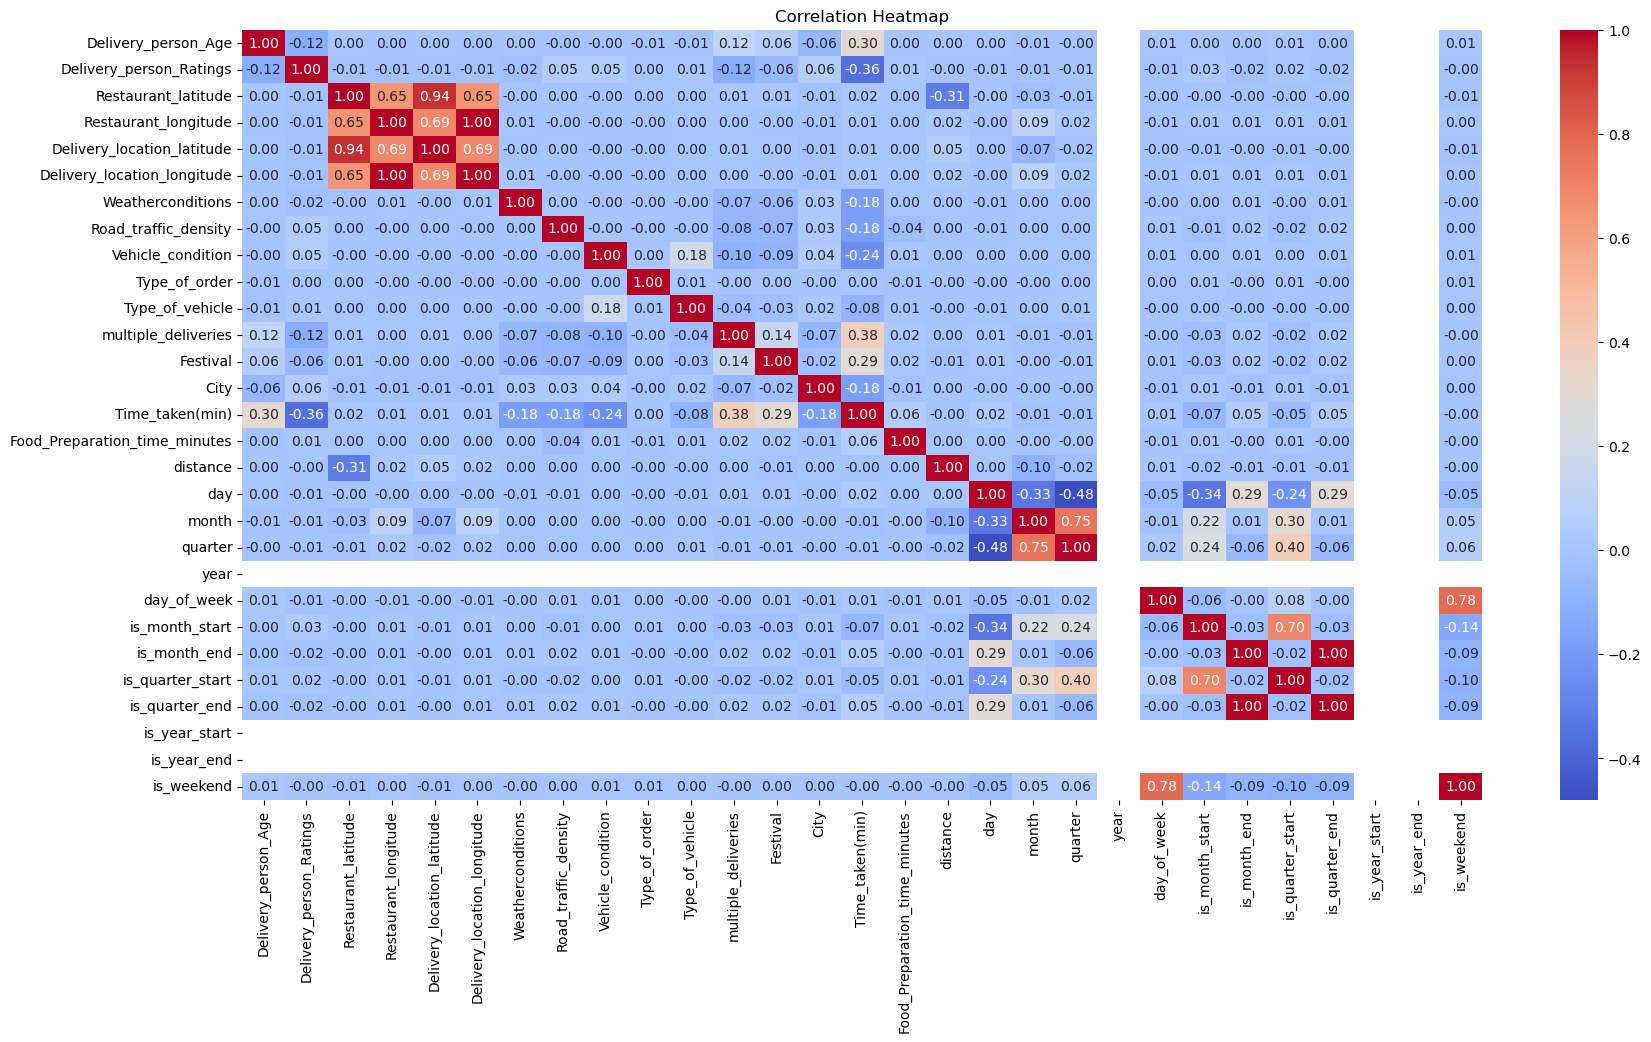

In [84]:
import matplotlib.pyplot as plt
correlation_matrix = new_df.corr()


plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()